### Modelado

Para este caso, elijo trabajar con el modelo de Random Forest porque:

* No se encontraron grandes correlaciones entre las variables con la variable objetivo, este es un modelo robusto que sirve para ser aplicado en este tipo de casos.
* Funciona bien para problemas de clasificación.
* Al utilizar múltiples árboles se reduce el riesgo de overfiting
* Se mantiene estable con nuevas muestras puesto que al utilizar cientos de árboles sigue prevaleciendo el promedio de sus votaciones.

Fuente: https://www.aprendemachinelearning.com/random-forest-el-poder-del-ensamble/

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve


from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [69]:
train = pd.read_csv('train1.csv')
train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached_ontime', 'Product_importance_enc', 'WarehouseBl_le',
       'ModeShip_le'],
      dtype='object')

In [70]:
X = train[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_enc', 'WarehouseBl_le', 'ModeShip_le']]
y = train[['Reached_ontime']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=12, stratify=y)

In [72]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [2,5, 10, 20, 30, 50 ,80, 100, 120, 140, 160]
i = 0
i_max = len(N_estimadores)
for estimadores in N_estimadores:
    i = i + 1
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

Completado: 100.0%


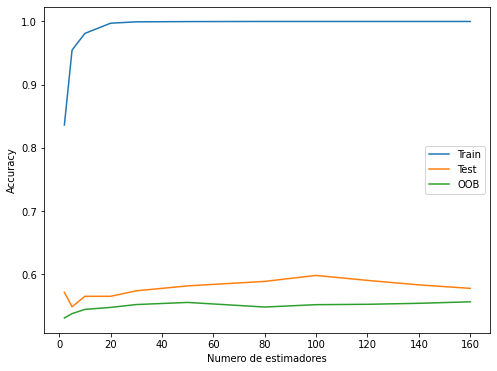

In [73]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score= True, random_state = 42)
clf.fit(X_train,y_train)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10864\1827709063.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [75]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [76]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.5979543666404405


In [77]:
print(metrics.precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 0))
print(metrics.precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 1))

(0.5940337224383917, 0.698170731707317, 0.641906096706377, None)
(0.604, 0.49105691056910566, 0.5417040358744395, None)


In [78]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Product_importance_enc', 'WarehouseBl_le', 'ModeShip_le'],
      dtype='object')

In [79]:
clf.feature_importances_

array([0.06680045, 0.07202721, 0.22660842, 0.07646013, 0.1117591 ,
       0.28929535, 0.04199479, 0.07408544, 0.0409691 ])

In [80]:
test = pd.read_csv('test.csv')
test = test[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_enc', 'WarehouseBl_le', 'ModeShip_le']]
pred = clf.predict(test)

In [81]:
pd.DataFrame(data=pred, columns=['pred']).to_csv('solealv.csv', index=False)